In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.worldometers.info/coronavirus/"

In [3]:
page = requests.get(url)

In [4]:
page

<Response [200]>

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
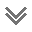

In [5]:
page.content

In [6]:
soup = BeautifulSoup(page.content,'html.parser')


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
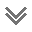

In [7]:
soup

As we can see from the inspect that table is located under the <table> tag and id = ‘main_table_countries_today’. After we have found the location of the table now we can define the variable. In this section, we define the table as ‘table1’.

In [14]:
# Obtain information from tag <table>
table1 = soup.find('table', id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New 

After the table1 has been created now the next thing we can do is inspecting the location of each column. If we look into each column we notice that they have the same characteristic.

In the picture above we can see the characteristic of each column is they are located under the tag <th>.

In [15]:
# CREATE A COLUMN LIST
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
 title = i.text
 headers.append(title)

After we found the tag of each column the next thing we can do is create a for loop to fill an empty list with each column. We define an empty list as headers

In [17]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

After the list of columns is made the next thing we can do is create a dataframe. We define the dataframe as mydata.

In [18]:
# Create a dataframe
mydata = pd.DataFrame(columns = headers)

In [19]:
# CREATE A FOR LOOP TO FILL DATAFRAME
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row

After the dataframe is created now we can fill it with items in each column. Before we create a for loop, we need to identify the location of the row and item column first

From the pictures of inspect we can identify that the row is located under tag <tr> and items are located under tag <td> . This is applied to all rows and items within the table.
After we found the tags now we can create a for loop.

In [20]:
mydata

#       Country,Other   TotalCases  NewCases TotalDeaths NewDeaths  \
0       \nNorth America\n   72,218,681   +11,626   1,259,498       +31   
1                \nAsia\n   86,958,174   +87,466   1,264,100      +331   
2       \nSouth America\n   41,127,213    +5,700   1,194,674       +28   
3              \nEurope\n   96,423,356  +115,037   1,552,593    +1,177   
4              \nAfrica\n   10,212,155    +5,105     232,054       +43   
..  ..                ...          ...       ...         ...       ...   
235                Total:   96,423,356  +115,037   1,552,593    +1,177   
236                Total:   10,212,155    +5,105     232,054       +43   
237                Total:    1,218,498   +71,612       4,670       +27   
238                Total:          721                    15             
239                Total:  308,158,798  +296,546   5,507,604    +1,637   

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ... TotalTests  \
0       51,336,741       +7,873  19,622,442           28,988  ...              
1       82,803,637      +20,210   2,890,437           26,043  ...              
2       38,087,641       +6,191   1,844,898           13,708  ...              
3       77,928,507     +129,091  16,942,256           22,358  ...              
4        9,013,164       +9,178     966,937            2,588  ...              
..             ...          ...         ...              ...  ...        ...   
235     77,928,507     +129,091  16,942,256           22,358  ...              
236      9,013,164       +9,178     966,937            2,588  ...              
237        525,809         +322     688,019              360  ...              
238            706                        0                0  ...              
239    259,696,205     +172,865  42,954,989           94,045  ...              

    Tests/\n1M pop\n Population          Continent 1 Caseevery X ppl  \
0                                    North America                \n   
1                                             Asia                \n   
2                                    South America                \n   
3                                           Europe                \n   
4                                           Africa                \n   
..               ...        ...                ...               ...   
235                                         Europe                     
236                                         Africa                     
237                              Australia/Oceania                     
238                                                                    
239                                            All                \n   

    1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop New Deaths/1M pop  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
..                 ...               ...              ...               ...   
235                                                                           
236                                                                           
237                                                                           
238                                                                           
239                                                                           

    Active Cases/1M pop  
0                        
1                        
2                        
3                        
4                        
..                  ...  
235                      
236                      
237                      
238                      
239                      

[240 rows x 22 columns]

After the dataframe is finished so the next thing we can do is export it into CSV format.

In [21]:
# EXPORT TO CSV AND TRY TO RUN IT
# Export to csv
mydata.to_csv('data.csv', index=False)
# Try to read csv
mydata2 = pd.read_csv('data.csv')

Since the dataframe has been exported into CSV now we can use the data to build a data science project, put it into machine learning, data analysis project, and so on.